## Blop detection notebook



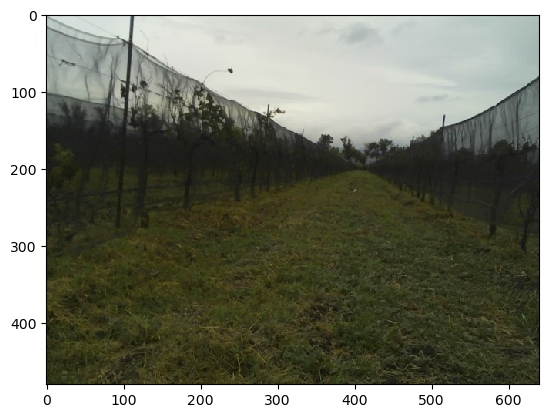

In [52]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

#img = cv2.imread("test_images/20221002-223527.jpg")
#img = cv2.imread("test_images/20221002-223338.jpg")
img = cv2.imread("test_images/20221019-203009.jpg")
#cv2.imshow("original",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Convertion to rgb in order to maintain the same colors in cv2 and pyplot
plt.imshow(original)
plt.show()
image=original

## Grayscale transformation


(480, 640)

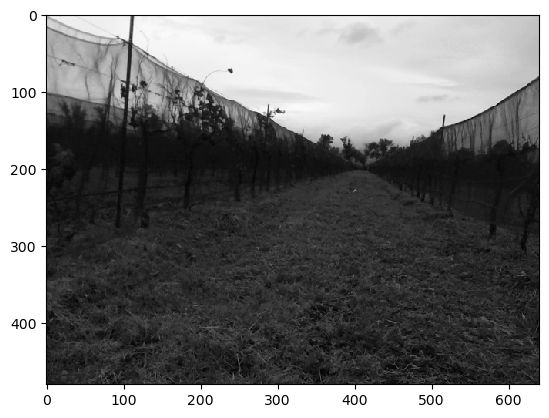

In [53]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
gray.shape

## Otsu Method




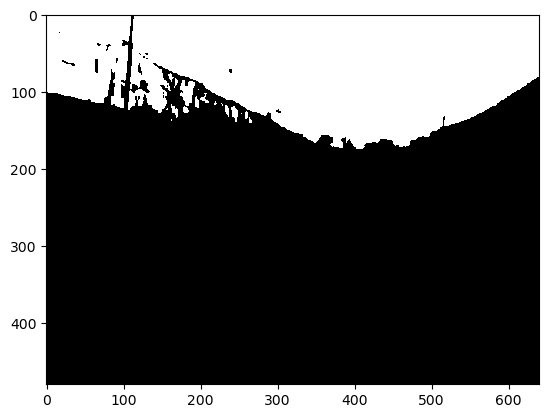

In [54]:
blur = cv2.GaussianBlur(gray,(5,5),0)
ret,otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(otsu,cmap='gray')



## Chose the biggest blop

19


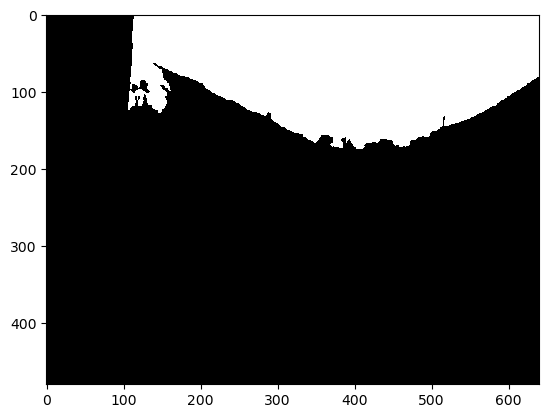

In [55]:
contours,hierarchy = cv2.findContours(otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
output = otsu.copy()
maxContour = 0
for contour in contours:
    
    contourSize = cv2.contourArea(contour)
    if contourSize > maxContour:
        maxContour = contourSize
        maxContourData = contour

# Create a mask from the largest contour
mask = np.zeros_like(otsu)
mask = mask.astype('uint8')
mask=cv2.fillPoly(mask,[maxContourData],1)
print (len(contours))
plt.imshow(mask,cmap='gray')
otsu = mask


## Edge detection



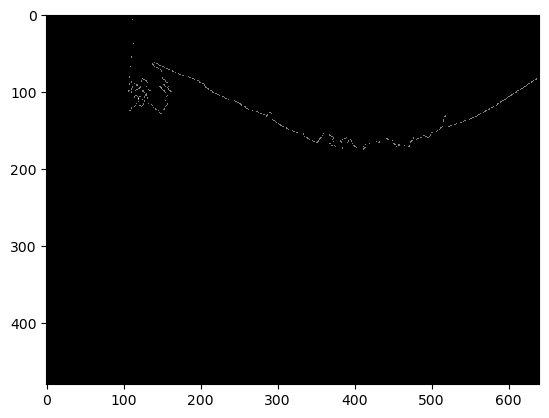

In [56]:
sobelxy = cv2.Sobel(src=mask, ddepth=-1, dx=1, dy=1)

#ret,sobelxy = cv2.threshold(sobelxy,0,255,cv2.THRESH_BINARY)

sobelxy = sobelxy.astype('uint8')

plt.imshow(sobelxy,cmap='gray')

## Line detection



NO LINES DETECTED


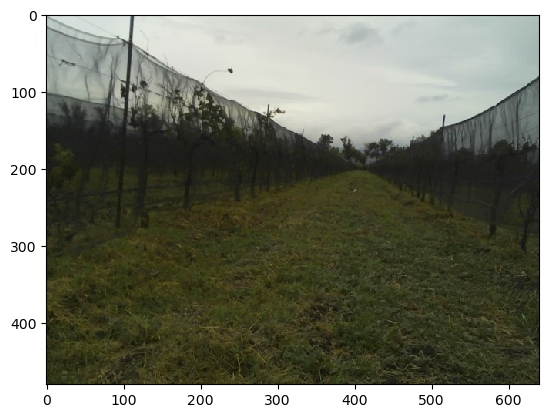

In [57]:
lines = cv2.HoughLines(sobelxy,1, np.pi / 360, 500, None, 0, 0) 
#lines = cv2.HoughLines(sobelxy,1, np.pi / 180, 50, None, 0, 0) 

#lines = cv2.HoughLinesP(sobelxy,1, np.pi / 270, 50, 100,0) 

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(image, pt1, pt2, (0,255,255), 3)
        print('line',i)
else:
    print("NO LINES DETECTED")
#cv2.imshow('houghlines',img)
plt.imshow(image)
plt.show()

## Colum sum analisys

In [58]:
x,y = otsu.shape
maxval = 0
otsu[0,639]
for i in range(y):
    value = np.sum(otsu[:,i])
    if value > maxval:
        maxval = value
        index = i
print(index)


403


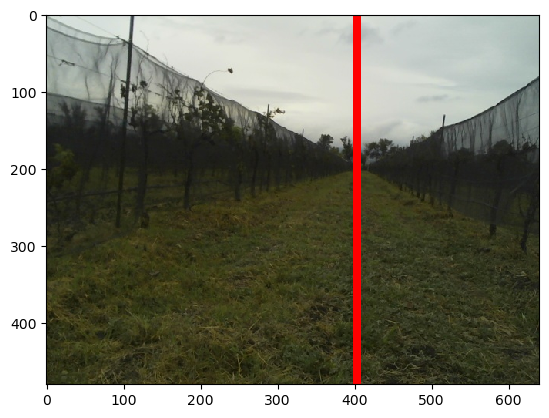

In [59]:
cv2.line(original,(index,0),(index,x),(255,0,0),9)
plt.imshow(original, cmap='gray')